# 데이터 선정 이유 및 문제 정의
- 머신러닝을 통한 주택가격 예측하기
    - 기존의 배웠던 내용을 복습하며 되세기 좋은 데이터로 선정

### 판단되는 문제 유형
- 분류를 통해 문제를 해결해야하는 것이 아닌 집값을 예측하는 것이므로 회귀로 접근

In [195]:
import sys

In [196]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ntrain = train.shape[0]

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


In [197]:
print(train.shape)

(1460, 80)


In [198]:
print(test.shape)

(1459, 79)


In [199]:
import numpy as np

In [200]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [201]:
y_train = train.SalePrice.values

In [202]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [203]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [204]:
submission = pd.read_csv("sample_submission.csv")

In [205]:
df = train

# EDA
- 타겟 변수 확인 및 시각화

In [206]:
import matplotlib.pyplot as plt

In [207]:
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm

- 데이터 분석 이전 타겟 변수의 분포 파악을 위한 시각화 작업

/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

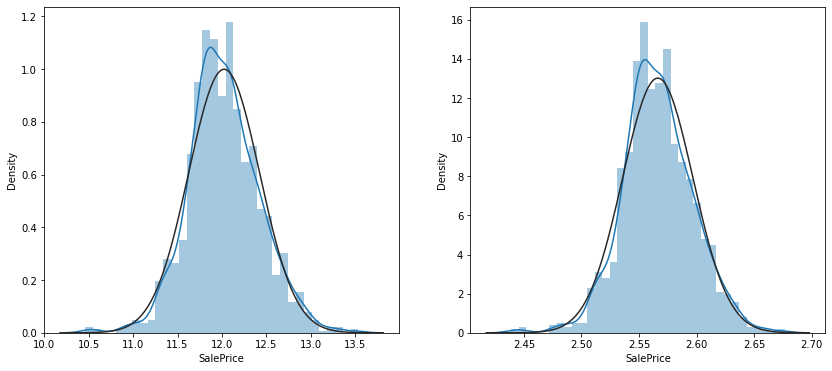

In [208]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df['SalePrice'], fit=norm, ax=ax1)
sns.distplot(np.log(df['SalePrice']+1), fit=norm, ax=ax2)

### 좌측은 타겟 변수의 분포도 그래프이며, 우측은 정규분포에 가깝게 보기위해 타겟 변수에 log로 변경한 것이다.

- 타겟을 선정할 때 가장 적합하다고 생각되는 "SalePrice"를 선택하였습니다.

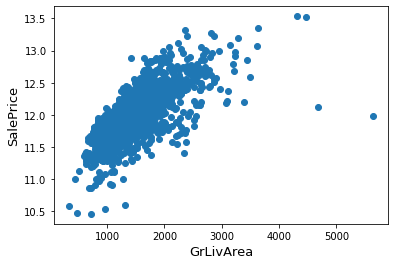

In [209]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# 변수간 상관관계 확인을 위한 히트맵

<AxesSubplot:>

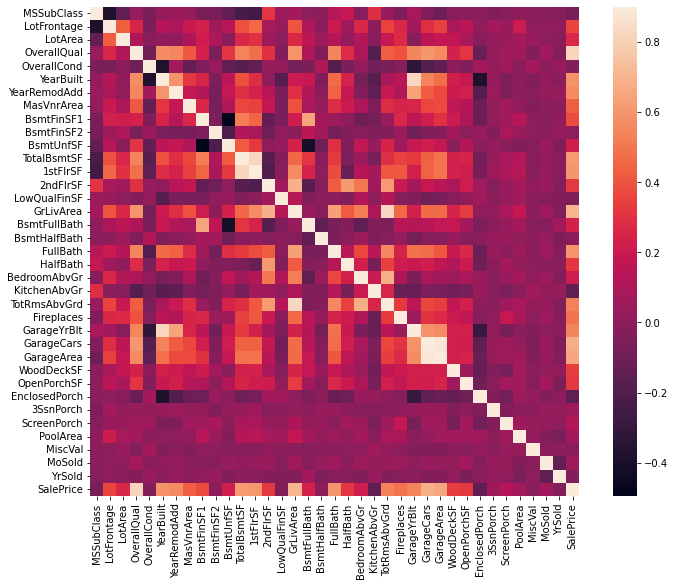

In [210]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

- 단순 히트맵을 그린 이유는 대략적인 상관성을 보기 위해서이다. 상관계수를 표기하여 다시 확인해보았습니다.

<AxesSubplot:>

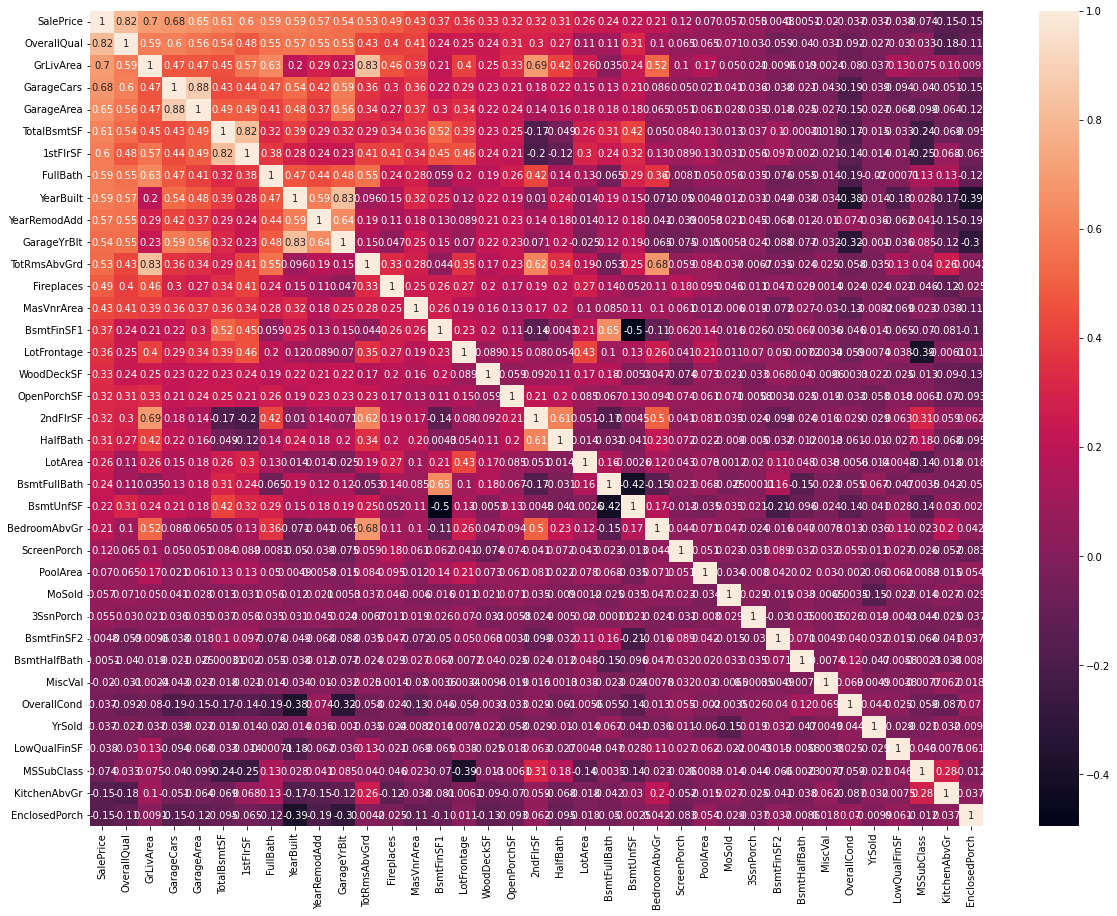

In [211]:
top_corr=df[corrmat.nlargest(40,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

In [212]:
df.corr()['SalePrice'].sort_values(ascending = False)[:10]

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64

- 이후에는 타겟값의 상위 10개 상관계수를 파악하였습니다. SalePrice 본인을 제외한 다음 가장 큰 값인 OverallQual이 0.79로 타겟 변수와의 상관관계가 가장 높은 것을 확인하였습니다.
- OverallQual이 증가하면 -> 집값 SalePrice도 증가할 수 있겠다라는 하나의 예측근거가 될 수 있습니다.

### 이어서 상관관계가 높은 3가지를 시각화해보았습니다.

/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

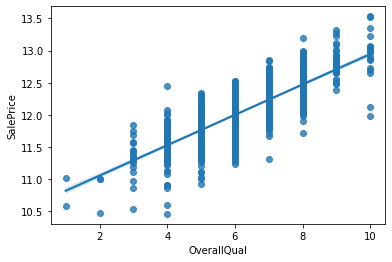

In [213]:
sns.regplot(df['OverallQual'], df['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

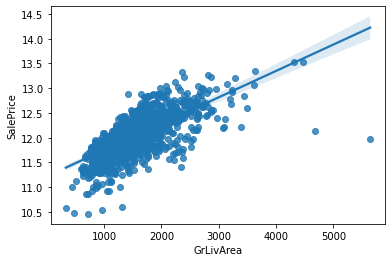

In [214]:
sns.regplot(df['GrLivArea'], df['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

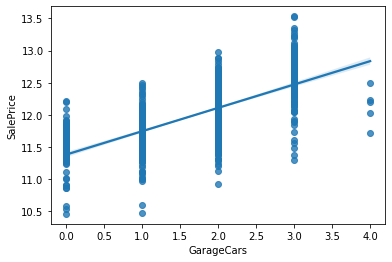

In [215]:
sns.regplot(df['GarageCars'], df['SalePrice'])

- 2번째 GrLivArea에서 특정 값을 넘어가는 순간 점들의 분산도가 높아지는 것을 볼 수 있습니다. 해당 값을 '이상치'라고 하는데 값을 없애 추후 머신러닝 정확도를 높이겠습니다.

In [216]:
# train = train.drop(train[(df['GrLivArea']>3500) & (df['SalePrice']< 400000)].index)

In [217]:
train_y = train['SalePrice']

In [218]:
train = train[list(test)]
df_all = pd.concat((train, test)).reset_index(drop=True)
print(df_all.shape)

(2919, 79)


In [219]:
train_y = df['SalePrice']

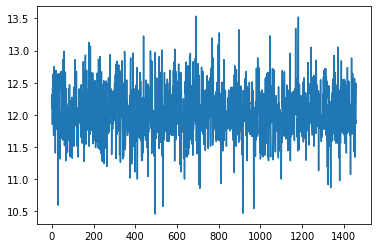

In [220]:
plt.plot(train_y)
plt.show()
# 로그를 씌우기 이전 SalePrice값

In [221]:
train_y = np.log(y_train + 1)

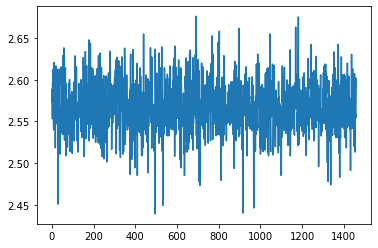

In [222]:
plt.plot(train_y)
plt.show()
# 로그값을 씌운 타겟값

# EDA
- 결측치 확인 및 제거

In [223]:
df_all.isnull().sum().sort_values(ascending=False)[:20]
# 혹시나 하는 마음에 확인해본 결측치 20등까지가 없는걸로 확인

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
dtype: int64

### 변수의 특성에 따라 결측치를 바꿔주기

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [225]:
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all["Fence"] = df_all["Fence"].fillna("None")
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")

In [226]:
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [227]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_all[col] = df_all[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_all[col] = df_all[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_all[col] = df_all[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_all[col] = df_all[col].fillna('None')

In [228]:
df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None")
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)

In [229]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

In [230]:
df_all = df_all.drop(['Utilities'], axis=1)

In [231]:
df_all["Functional"] = df_all["Functional"].fillna("Typ")

In [232]:
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

In [233]:
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [234]:
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [235]:
df_all['MSSubClass'] = df_all['MSSubClass'].fillna("None")

In [236]:
df_all.isnull().sum().sort_values(ascending=False)[:20]
# 혹시나 하는 마음에 확인해본 결측치 20등까지가 없는걸로 확인

Electrical      1
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
GarageFinish    0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageYrBlt     0
MSSubClass      0
dtype: int64

### 위의 코드 최대한 간략하게 설명하기
- 결측치 확인하여 처리할 때 범주형 변수는 문자열로 채워주고, 수치형 변수는 0으로 채워준다. 마지막으로 시설물의 유무 파악이 어려운 변수들은 애매하므로 최빈값으로 채워준다.

# 데이터를 이용한 가설 및 평가지표, 베이스라인 선택

1. 질량은 크기에 비례한다. 마찬가지로 면적이 커질 수록 모델의 집값은 오를 것이라는 가설을 세웠습니다.
2. 평가지표는 RMSE
3. 베이스라인 모델로 사용할 것은 Lasso Regression

### 모델 학습에 앞서 추가 Feature Engineering

In [237]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)
df_all['OverallCond'] = df_all['OverallCond'].astype(str)
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

In [238]:
all_data_na = (df_all.isnull().sum() / len(df_all)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
Electrical,0.034258


In [239]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))


print('전체 크기는: {}'.format(df_all.shape))

전체 크기는: (2919, 78)


In [240]:
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [241]:
df_all = pd.get_dummies(df_all)
print(df_all.shape) # 더미 데이터 추가

(2919, 221)


### 모델링 시작

In [242]:
train = df_all[:ntrain]
test = df_all[ntrain:]

In [243]:
print(train.shape, test.shape)

(1460, 221) (1459, 221)


In [244]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 베이스라인 모델

In [245]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [246]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [247]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1373 (0.0301)



# 프로젝트 모델

In [251]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [252]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [255]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [257]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [258]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [259]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

In [260]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=4.9556e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.41479e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=5.26308e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/cmblir/miniforge3/envs/k_subway/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=4.80428e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=Tr

0.07063723075595103


# 최종적으로 사용한 모델과 방식
- 스태킹 방식의 모델링

    - 스태킹 방식은 여러가지 기본 모델을 기반 예측값을 기반으로 최종 모델의 학습 데이터로 사용하는 예측방법입니다.
    - 제가 사용한 기본 모델은 ENet, GBoost, KRR입니다.
    - 해당 모델들이 예측한 값을 기반으로 최종 모델인 lasso에 학습 데이터로 사용됩니다.

- 베이스라인 모델과의 평가지표를 통한 성능 비교

    - 0.1373이라는 점수로 비교적 낮았으나 이후 스태킹 모델을 사용한 결과 0.070이라는 거의 2배가량 증가하였습니다.

### 해당 모델 분석 및 제작은 SERIGNE의 머신러닝 분석을 참조하였습니다.

- 현재 0.07~의 경우 캐글에서 4500명중 상위 4%의 점수입니다.